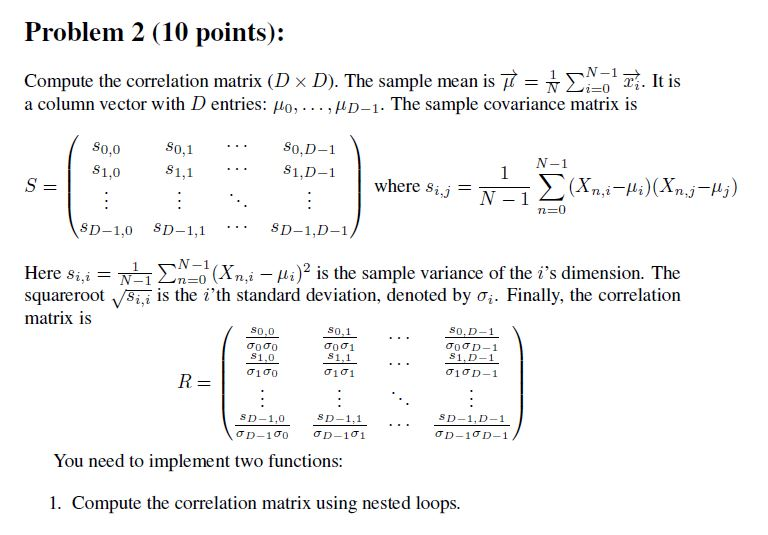

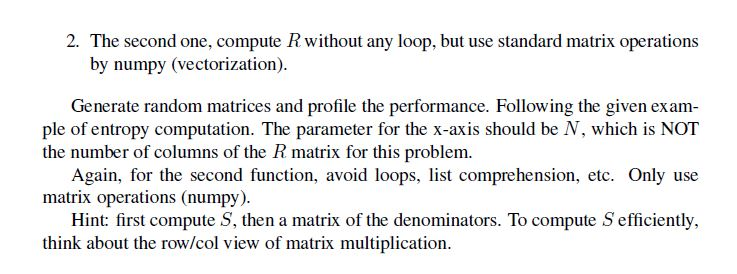

In [64]:
import numpy as np
import time
import matplotlib.pyplot as plt

iter_n = 10
ncols = 10
np.random.seed(2021)

def createX(m, n):
  # m is the number of rows in the matrix, corresponding to the number of instances
  # n is the number of columns in the matrix, corresponding to the number of features
  return np.random.randint(100, size=(m, n))

In [65]:
def corr_loop(X):
  n = X.shape[1]              # the number of columns in matrix X
  S = np.zeros((n, n))        # initialize covariation matrix S
  # calculate columne mean of X
  u = np.zeros((1, n))
  for k in range(n):
    u[0, k] = np.mean(X[:, k])
  # calculate the covariation matrix and standard deviation
  sd = np.zeros((1, n))       # initialize the standard deviation matrix
  for i in range(n):
    for j in range(n):
      for m in range(X.shape[0]):
        S[i,j] += (X[m, i] - u[0, i])*(X[m, j] - u[0, j])
      S[i,j] /= (n-1)
      if i == j:                       # on the diagonal of the matrix
        sd[0,i] = np.sqrt(S[i, j])     # calculate the standard deviations
  # initialize correlation matrix R
  R = np.zeros((n, n))
  # calculate the correlation matrix
  for i in range(n):
    for j in range(n):
      R[i,j] = S[i,j]/(sd[0, i]*sd[0, j])
  return R

In [66]:
def corr_vec(X):
  # this function calculate the correlation matrix by matrix operations
  # instead of nesting loops
  n = X.shape[1]              # the number of columns in matrix X
  u = np.mean(X, axis=0)      # u is the column means
  dev = X-u                   # dev is the deviations, xi-column_mean
  S = np.dot(dev.transpose(), dev)   # S is the covariance matrix
  sd = np.sqrt(np.diagonal(S))       # sd is the standard diviation matrix
  sd = np.reshape(sd, (-1, sd.shape[0]))
  R = (S/sd)/np.transpose(sd)        # R is the correlation matrix 
  return R

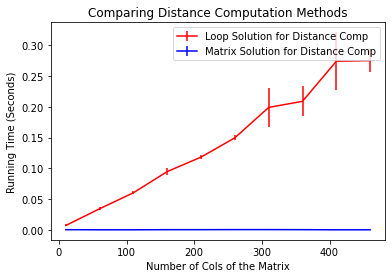

In [69]:
rows = range(10, 501, 50)
nrows = len(rows)
# define 2d list to record the performances
perf_loop = [[]]
perf_vec = [[]]

# run 2 approaches in various sizes of matrix iter_n times
for m in rows:
  p_loop = []
  p_vec = []
  for i in range(iter_n):
    X = createX(m, ncols)
    begin_t = time.time()
    R_loop = corr_loop(X)
    end_t = time.time()
    p_loop.append(end_t-begin_t)

    begin_t = time.time()
    R_vec = corr_vec(X)
    end_t = time.time()
    p_vec.append(end_t-begin_t)  
    
    assert np.allclose(R_loop, R_vec, atol=1e-06) # check the identity of two matrices produced in two ways

  perf_loop.append(p_loop)
  perf_vec.append(p_vec) 

# convert the 2d list to np.array
perf_loop.pop(0)
perf_vec.pop(0)
perf_loop = np.array(perf_loop)
perf_vec = np.array(perf_vec)

# next 14 line codes refer to ComputeMatrices.py by Dr. Chia-Ling Tsai
u_loop = np.mean(perf_loop, axis = 1)
u_vec = np.mean(perf_vec, axis = 1)
std_loop = np.std(perf_loop, axis = 1)
std_vec = np.std(perf_vec, axis = 1)

plt.figure(1)
plt.errorbar(rows, u_loop, yerr=std_loop, color='red',label = 'Loop Solution for Distance Comp')
plt.errorbar(rows, u_vec, yerr=std_vec, color='blue', label = 'Matrix Solution for Distance Comp')
plt.xlabel('Number of Cols of the Matrix')
plt.ylabel('Running Time (Seconds)')
plt.title('Comparing Distance Computation Methods')
plt.legend()
#plt.savefig('CompareDistanceCompFig.pdf')
plt.show()    # uncomment this if you want to see it right way
#print "result is written to CompareDistanceCompFig.pdf"

In [68]:
u_loop

array([0.00730014, 0.0345017 , 0.06150346, 0.09419994, 0.13130119,
       0.14679918, 0.17850001, 0.20140264, 0.24409661, 0.27110007])

In [62]:
u_vec

array([0.00000000e+00, 0.00000000e+00, 2.03156471e-04, 1.00016594e-04,
       2.00176239e-04, 1.00135803e-04, 2.00128555e-04, 1.97100639e-04,
       9.99689102e-05, 1.99890137e-04])